# TRANSCRITICAL+ : 
# A SIMPLIFIED MODEL OF PURKINJE CELL DYNAMICS

In [175]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np

The model expands on three simple equations from what is called the Transcritical Hybrid Model, sourced from a paper by Drion in 2012 that accounts for two different modes of Neuronal Excitability: tonic firing and burst-pause firing. The three equations that determine the behavior of the soma are the following:
$$
\begin{align}
\frac{dV_s}{dt} &= (V_s-E_L)^2 + b(V_s-E_L)w_s - w_s^2 + I - z \\
\frac{dw_s}{dt} &= \epsilon \frac{a_s(V_s-E_L) - w_s + w_0} {\tau_w} \\
\\
\frac{dz}{dt} &= -\epsilon_z \frac{z}{\tau_{Ca}} \\
\end{align}
$$
Whereby changing the parameter $w_0$ from positive to negative the dyamics follow the two afromentioned behaviors. By modifying slightly the three equations by making the switch between behaviors continuous we obtain the following:
$$
\begin{align}
\frac{dV_s}{dt} &= (V_s-E_L)^2 + b(V_s-E_L)w_s - w_s^2 + I - z_{\text{eff}} + g_{SD}(V_d-V_s)  \\
\frac{dw_s}{dt} &= \epsilon \frac{a_s(V_s-E_L) - w_s + w_0 - \alpha \text{Ca}}{\tau_w} \\
\\
z_{\text{eff}} &= (1-T)z + Tz_{\text{max}} + d_{\text{res}}\\
\frac{dT}{dt} &= \frac{1}{1 + \exp(-l(z-z_{\text{max}}))} - T \\
\frac{dz}{dt} &= -\epsilon_z \frac{z}{\tau_{Ca}} \\
\epsilon _ z &= \epsilon _{z,0} - \frac{\Delta \epsilon_z}{1+e^{-l(z-z_{max})}}\\
\end{align}
$$
where the $\alpha Ca$ accounts for the influence of the Calcium levels of the Purkinje Cell in inducing a pause in its firing.
$z_{eff}$ shows the bounded nature of z (which represents the slow dynamics associated with the Ca-activated K-channels, pumps and buffers). $\epsilon_z$ is also made into a variable that will slow down the $z$ dynamics when its value is high enough (representing the slower 'work rate' when the cell is injected with a current that activates the channels and pumps).
The coupling term implies the existence of the main dendritic trunk, represented by the equations
$$
\begin{align}
\frac{dV_d}{dt} &= g_{DS}(V_s-V_d) + \sum_{i=1}^3 g_i(V_{sdi}-V_d) + DSF_0 e^{\frac{V_d-V_{th}}{\Delta T}} - w_d \\
\frac{dw_d}{dt} &= \frac{a_d(V_d-E_L) - w_d}{\tau_w} \\
\end{align}
$$
which are highly coupled to the soma and follow the dynamics of a simple AdEx model. This Main Dendritic Trunk, refered to as M0, is coupled to three dendritic tree compartments
$$
\begin{align}
\frac{dV_{sdi}}{dt} &= g_{0}(V_d-V_{sdi}) + SDSP_i\, \Delta T_{sd} e^{\frac{V_{sdi}-V_{th,sdi}}{\Delta T}} - w_{sdi} + \gamma_i I_{PF, i} \\
\frac{dw_{sdi}}{dt} &= \frac{a_{sd}(V_{sdi}-E_L) - w_{sdi}}{\tau_w}
\end{align}
$$
with i=1,2,3. These compartments are the connection between the Purkinje Cell and the Granule Cell Layer, which provides the PC with somatosensory input via the parallel fibers, expressed by the $I_{PF, i}$. The factors $\gamma_i$ can be subject to plasticity experiments later on.

Regarding the handling of Calcium levels, the model is set so the level of intracellular calcium is rescaled so that Ca=0 refers to normal, "steady state" level. Upon the introduction of external stimuli in the form of CF (in the soma) or PF (in the dendritic trees), Calcium levels vary according to the following dynamics:
$$
\begin{align}
\frac{dCa}{dt} &= \frac{\nu Ca_s}{1+e^{-c(V_s-V_{th,s})}} + \nu Ca_d\,\sum_{i=1}^3 e^{\frac{vd_i-v_{th,d}}{\Delta Ca_V}} - \frac{Ca}{\tau_{Ca}}\\
\nu Ca_s &= \overline{\nu Ca_s}\,\frac{I_{CF}}{K_{CF}\,I_{CF}}\\
\nu Ca_d &= \overline{\nu Ca_d}\,\frac{I_{PF}}{K_{PF}\,I_{PF}}\\
I_{PF}&=\sum_{i=1}^3 \gamma_i\,I_{PF,i}\\
\alpha &= 
\begin{cases} 
slp\,(Ca_{1/2}-Ca) + \frac{\alpha_{max}}{1+e^{-n(Ca-Ca_{1/2})}} & \text{if } Ca < Ca_{1/2} \\
\frac{\alpha_{max}}{1+e^{-n(Ca-Ca_{1/2})}} & \text{if } Ca > Ca_{1/2}
\end{cases}
\end{align}
$$

The increase in Calcium levels from CF is substantialy larger. The last equation shows the definition of $\alpha$, which determines the influence of the calcium levels on the increase or pause in the firing frequency of the soma. The threshold $Ca_{1/2}$ sets the Calcium level at which the bifurcation between tonic and burst-pause firing occurs.


A final key component of the model is the reaction to spikes, both somatic and dendritic. After a somatic spike, the variable z undergoes an updating process that obeys the following rule:
$$
\begin{align}
z &= z+d_z+act \, \beta \, Ca
\end{align}
$$
The update of $z$ is thus dependent on the Ca levels, with $\beta$ a constant. To better reflect the physiological processes that $z$ represents, mainly the work of BK channels in between spikes, the variable $act$ is created to play the role of the calcium-dependent activation of these K channels. It follows a sigmoidal form:
$$
\begin{align}
    act&=\frac{1}{1+exp(-m*(Ca-Ca_{1/2}))}
\end{align}
$$
where once again the parameter $Ca_{1/2}$ acts as a threshold between a smal update magnitude and a big one (causing a longer pause). Physiologically, the correlation between $\alpha$ and $act$ explains the overall effect of the BK channel activation. For low values of Calcium, these channels have are mostly closed and the PC doesn't experiment any changes. But for a large Ca influx, such as the one caused by CF input, the BK channels open, the PC goes into burst-pause mode (mediated by $\alpha$) that typically lasts, within the CF Complex Spike context, around 100ms (pause duration is mediated by $z$ and $z_{eff}$). 

Notice there is an extra component in the definition of $z_{eff}$ we have not made mention of, $d_{res}$. The variable $z$ alone is a good actor for the inner workings of the BK channels that cause longer hyperpolarization periods in the PC. After a pause in the firing of the PC, the firing resumes at a lower rate and takes some time to recover its usual frequency. This is due to the working of Potassium pumps and Calcium buffers, as well as synaptic mechanisms. The extra component in the definition of $z_{eff}$ we have not made mention of, $d_{res}$, takes care of this effect. 
$$
\begin{align}
\frac{d\,d_{\text{res}}}{dt}&=\frac{d_{\text{res,coeff}}\,act - d_{\text{res}}}{\tau_{Ca}}
\end{align}
$$
A relevant contribution of $d_{res}$ will only occur after the activation of the BK channels, working as a signal for a big Ca influx and a subsequent pause.

Finally, dendritic spikes (DS) in the PC also bring with them large Calcium influxes that can cause (smaller) pauses in the soma. Therefore, upon a DS the variable $z$ is also updated:
$$
\begin{align}
z &= z+DS_{\text{coeff}}d_z
\end{align}
$$

### Parameter values
Here are some initial estimates for the parameters appearing in the equations above

In [171]:
#PARAMETERS
#LEAK VOLTAGE ON Vd?

a=0.1*uS #Soma voltage influence on adaptation variable dynamics
b=-3*uS  # coefficient for fitting w*v term
vreset=-55*mV  # reset potential
wreset=15*nA  #reset adaptation
eps=1 #scaling adaptation dynamics
Iint=92 #Current to fire at PC intrinsic freq (representing sodium currents)

C=2*nF #Capacitance soma

v_sp=-5*mV #threshold potential soma
d_z=40*nA #pumping addition on spikes

el=-61*mV #resting potential
vth= -45*mV #threshold for dendrite to spike


g_sd=3*uS #coupling soma–dendrites
g_ds=6*uS #coupling dendrite–soma

# q= 0.1 #fraction of cf input directed onto dendrite

ad=2*uS
DeltaV= 1*mV #slope of AdEx dendrite
#used for Ca dynamics; LOOK INTO THAT
vthd= -40*mV
vths= -45*mV
vd_sp=-35*mV #peak of dendrite spike
Cd=C
wdreset=15*nA
wiggle_vd=3*mV

#Ca_base=-40*nA
#vCas=0.001*(nA/ms) #influence of soma on overall calcium levels
#vCad=0.1*(nA/ms) #influence of dedndrites on overall calcium levels
DeltaCaV=5*mV #Slow down how fast the calcium rises
max_alpha= 0.1 #calcium level influence on adaptation dynamics

vth= -45*mV

Kcf=5*nA
max_vCas=100*(nA/ms)

Kpf=2.5*nA
max_vCad=1*(nA/ms)

Ca_half=35*nA

tauw=1*ms #adaptation time constant
tauCa=100*ms #calcium time constant
tauT=10*ms

zmax=100*nA
zlim=zmax+50*nA

c=0.1*(1/mV) #Slow down how fast the calcium rises
l=0.1*(1/nA) #capping of zeff
m=0.3*(1/nA) #activation of Ca act K channels

sdcf1,sdcf2,sdcf3=np.array([1,1,1])*4

g1=1*uS*sdcf1
g2=1*uS*sdcf2
g3=1*uS*sdcf3

eps_z0=10
Deltaeps_z=9
dres_coeff=75
slp=5e-4*(1/nA)

n=0.1*(1/nA) #alpha activation (activation of calcium channels leading to BK channel activation)

gl=0.1*uS
asd=0.1*uS
vsd3reset=-55*mV
vsd2reset=-50*mV
wsdreset=15*nA
vsd_sp=-20*mV
Csd=5*nF

g0=1*uS
DeltaVsd=5*mV

vth3=-42.5*mV
vth2=-42.5*mV

sdsf3=3.25*uS
sdsf2=2.25*uS
sdsf0=5

gamma1=25
gamma2=25
gamma3=25

beta=4
dsp_coeff=1
w00=4


### Equations and Currents

In [172]:
eqs_soma='''
dVs/dt=(((el-Vs)**2*uS**2 + b*(Vs-el)*ws  - ws**2)/nA + I - zeff + g_sd*(Vd-Vs) )/C : volt
dws/dt=eps*(a*(Vs-el)-ws+w0-alpha*Ca)/tauw : amp
I=Iint*nA+Iinh : amp
'''

eqs_dend='''
dVd/dt=(g_ds*(Vs-Vd+wiggle_vd)+g3*(vd3-Vd)+g2*(vd2-Vd)+g1*(vd1-Vd)+
sdsf0*(DeltaV)*exp((Vd-vth)/(DeltaV))*uS-wd)/Cd : volt
dwd/dt=(ad*(Vd-el)-wd)/tauw : amp
'''

eqs_z='''
dz/dt=-eps_z*z/tauCa : amp
eps_z= eps_z0 - Deltaeps_z/(1+exp(-l*(z-0.75*zmax))) : 1
zeff=((1-T)*(int(z>zlim)*zlim + int(z<zlim)*z) + T*zmax) + dres : amp
dT/dt=((1/(1+exp(-l*(z-zmax))))-T)/tauT : 1
act=1/(1+exp(-m*(Ca-Ca_half))) : 1

ddres/dt=(act*dres_coeff*nA-dres)/tauCa : amp
'''

eqs_Ca='''
Ipf=gamma1*Ipf1+gamma2*Ipf2+gamma3*Ipf3 : amp
dCa/dt= vCas / (1+exp(-c*(Vs-vths))) + vCad*(exp((vd3-vthd)/(DeltaCaV)) + exp((vd2-vthd)/(DeltaCaV)) + 
exp((vd1-vthd)/(DeltaCaV))) - Ca/tauCa :amp
vCas= max_vCas*Icf / (Kcf+Icf) : amp/second
vCad= max_vCad*Ipf / (Kpf+Ipf) : amp/second
alpha= int(Ca<Ca_half) * ( slp*(Ca_half-Ca) + max_alpha / (1+exp(-n*(Ca-Ca_half))) ) + 
int(Ca>Ca_half)* ( max_alpha / (1+exp(-n*(Ca-Ca_half))) ) : 1
'''

eqs_sd='''
dvd3/dt=(g0*(Vd-vd3)+gl*(el-vd3+wiggle_vd)+sf3*(DeltaVsd)*exp((vd3-vth3)/(DeltaVsd))-wd3+gamma3*Ipf3)/Csd : volt
dwd3/dt=(asd*(vd3-el)-wd3)/(tauw) : amp

dvd2/dt=(g0*(Vd-vd2)+gl*(el-vd2+wiggle_vd)+sf2*(DeltaVsd)*exp((vd2-vth2)/(DeltaVsd))-wd2+gamma2*Ipf2)/Csd : volt
dwd2/dt=(asd*(vd2-el)-wd2)/tauw : amp

dvd1/dt=(g0*(Vd-vd1)+gl*(el-vd1+wiggle_vd)-wd1+gamma1*Ipf1)/Csd : volt
dwd1/dt=(asd*(vd1-el)-wd1)/tauw : amp

sf3 : siemens
sf2 : siemens
'''

currents='''
Icf : amp
Ipf1 : amp
Ipf2 : amp
Ipf3 : amp
Iinh : amp
w0 : amp
'''


### Setting up & Running a simulation

Below you find the commands to run a simulation of a specific time, where you can insert PF or CF currents at specific moments in the simulation

In [173]:
dt=0.02
start_scope()

PC = NeuronGroup(1, eqs_soma+eqs_dend+eqs_z+eqs_Ca+currents+eqs_sd,
                    threshold='Vs > v_sp',
                    reset= 'Vs=vreset; ws=wreset; z+=d_z+beta*act*Ca',
                    events= {'dendsp' : 'Vd>vd_sp', 's3sp':'vd3>vsd_sp', 's2sp':'vd2>vsd_sp',},
                    method='euler',dt=dt*ms)

PC.Vs=el
PC.Vd=el
PC.vd1=el
PC.vd2=el
PC.vd3=el

PC.sf3=sdsf3
PC.sf2=sdsf2

PC.T=0
PC.w0=w00*nA

PC.run_on_event('dendsp','Vd=vreset; wd+=wdreset')
PC.run_on_event('s3sp','vd3=vsd3reset; wd3+=wsdreset; z+=dsp_coeff*d_z') #pending restoration
PC.run_on_event('s2sp','vd2=vsd2reset; wd2+=wsdreset; z+=dsp_coeff*d_z') #pending restoration

state = StateMonitor(PC, ['Vs','ws','z','zeff','eps_z','T','act','dres','alpha','Vd','wd','Ca','vd3','vd2','vd1'],
                     record=True,dt=dt*ms)
spikes = SpikeMonitor(PC, variables=['Vs','Vd','vd2','vd3'])

run(150*ms)
#PC.Ipf3=0.15*nA
PC.Ipf2=0.2*nA
run(30*ms)
PC.Ipf3=0*nA
PC.Ipf2=0*nA
run(50*ms)
PC.Icf=10*nA
run(5*ms)
PC.Icf=0*nA
run(200*ms)

### Plots

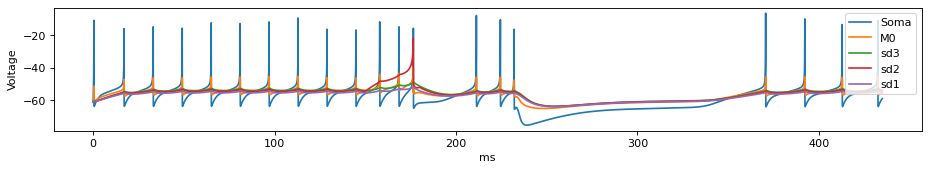

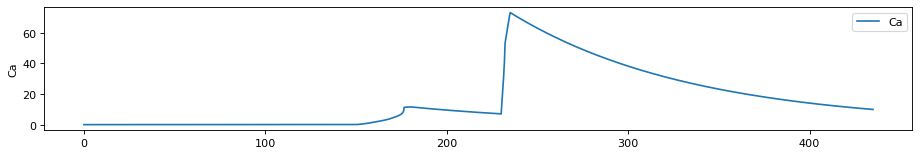

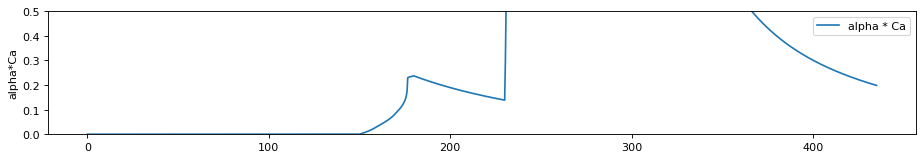

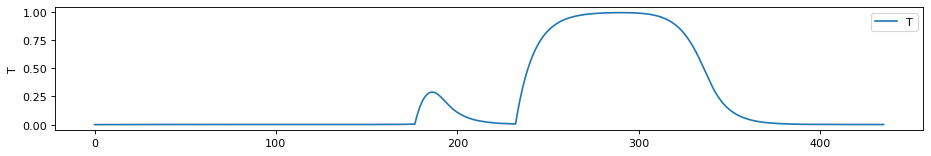

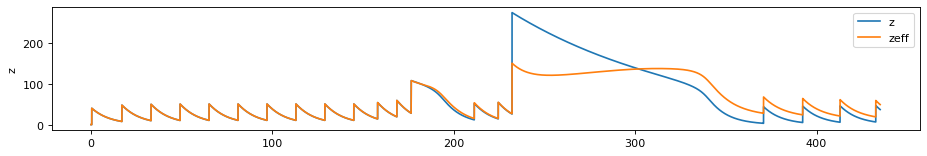

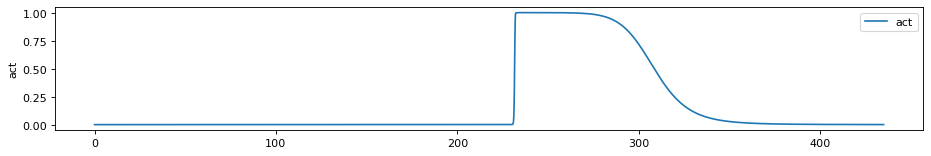

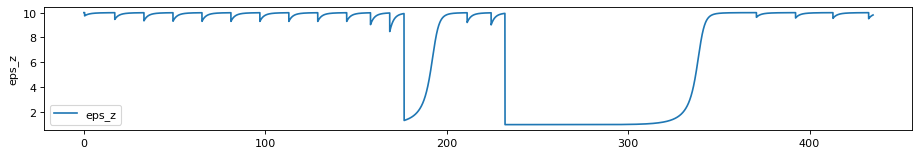

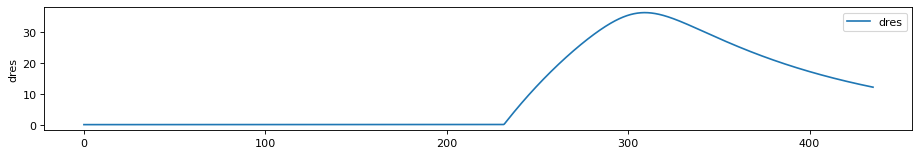

In [174]:

figure(figsize=(14, 2), dpi= 80, facecolor='w', edgecolor='k') 
plot(state.t/ms,state.Vs[0]/mV,label='Soma')
plot(state.t/ms,state.Vd[0]/mV,label='M0')
plot(state.t/ms,state.vd3[0]/mV,label='sd3')
plot(state.t/ms,state.vd2[0]/mV,label='sd2')
plot(state.t/ms,state.vd1[0]/mV,label='sd1')
xlabel('ms')
ylabel('Voltage')
legend(loc='upper right')
show()
figure(figsize=(14, 2), dpi= 80, facecolor='w', edgecolor='k') 
plot(state.t/ms,state.Ca[0]/nA,label='Ca')
ylabel('Ca')
legend()
show()
figure(figsize=(14, 2), dpi= 80, facecolor='w', edgecolor='k') 
plot(state.t/ms,state.alpha[0]*state.Ca[0]/nA,label='alpha * Ca')
ylabel('alpha*Ca')
ylim((0,0.5))
legend()
show()
figure(figsize=(14, 2), dpi= 80, facecolor='w', edgecolor='k') 
plot(state.t/ms,state.T[0],label='T')
ylabel('T')
legend()
show()
figure(figsize=(14, 2), dpi= 80, facecolor='w', edgecolor='k') 
plot(state.t/ms,state.z[0]/nA,label='z')
plot(state.t/ms,state.zeff[0]/nA,label='zeff')
ylabel('z')
legend()
show()
figure(figsize=(14, 2), dpi= 80, facecolor='w', edgecolor='k') 
plot(state.t/ms,state.act[0],label='act')
ylabel('act')
legend()
show()
figure(figsize=(14, 2), dpi= 80, facecolor='w', edgecolor='k') 
plot(state.t/ms,state.eps_z[0],label='eps_z')
ylabel('eps_z')
legend()
show()

figure(figsize=(14, 2), dpi= 80, facecolor='w', edgecolor='k') 
plot(state.t/ms,state.dres[0]/nA,label='dres')
ylabel('dres')
legend()
show()

### Extra

In [ ]:
t=np.array(state.t)*1000
vs=np.array(state.Vs[0])*1000
vd=np.array(state.Vd[0])*1000
w=np.array(state.ws[0])*1e9
z=np.array(state.zeff[0])*1e9
I=[Iint for i in range(len(t))]
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k') 
plot(t,(vs+61)**2,label='V**2')
plot(t,-3*(vs+61)*w,label='-3vw')
plot(t,-w**2,label='-w**2')
plot(t,I,label='Iint')
plot(t,3*(vd-vs),label='3*(vd-vs)')
plot(t,(vs+61)**2+-3*(vs+61)*w-w**2+3*(vd-vs)+Iint,label='Total',color='black',linewidth=3)
plot(t,-z,label='-zeff',color='red',linewidth=3)
axhline(y=0,linestyle='--',color='gray')
legend()
xlim((250,400))
ylim(-200,200)
show()